In [ ]:
#SUPPORT VECTOR MACHINE 

In [1]:
#Import Core Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the file
mydata=pd.read_csv("banknote.csv")
mydata.head()

,VARWAVELET,SKEWWAVELET,KURTWAVELET,ENTROPYIMAGE,CLASS
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
#Define X and Y
X=mydata.iloc[:,0:4]
#print(X)
Y=mydata["CLASS"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
X_train.shape

(960, 4)

In [6]:
#Build the SVM Model for linear kernel
svc_model=SVC(kernel="linear",probability=True) #rbf
SVM1=svc_model.fit(X_train,Y_train)
SVM1
SVM1.decision_function(X_train)

#LINEAR KERNEL IS USED WE CAN ALSO USE DIFFERENT KERNELS LIKE rbf, POLYNOMIAL ETC

array([ -3.60160655,   3.56632892,   4.0083389 ,   6.71561424,
         6.25873635,   7.01082728,  -5.67488631, -13.76081634,
       -10.86900202, -10.8190919 , -11.90451834, -13.0461181 ,
        -8.4985688 ,   3.9058267 ,  -9.78922618,   8.92829328,
        -9.51380207,   4.78663705, -10.2321903 ,   3.50013475,
         7.28842757, -13.1298681 ,   1.59768383,  -7.89741533,
        -7.03388704,   4.71144256, -12.46572404,  -7.58434997,
        -8.41383265,   9.55631982,   5.05045327,   3.35090868,
        -9.16939899,  -8.03398915,   4.61732014,  -9.51867467,
         2.31250977,  -8.37826502, -10.28517907,  -8.37858734,
        -3.13479663,  -9.83671594,  -8.53598167, -10.51714047,
       -17.01988097, -12.28925091,  -7.6474554 , -12.38590207,
         3.10716507,  -7.19178615,   5.47739765, -12.25768405,
       -12.36782495,  -7.72958936,   7.23154051,  -6.2279014 ,
         3.92028667,  -2.19174547,  -9.59814854,   8.23669696,
         5.45491909,  -7.7452371 ,   5.20148962,  -8.63

In [8]:
#Overall Accuracy,recall,precision
Prediction=SVM1.predict(X_train)
print("Accuracy=","{:.4f}".format(accuracy_score(Y_train,Prediction)))
print("Recall=","{:.4f}".format(recall_score(Y_train,Prediction)))
print("Precision","{:.4f}".format(precision_score(Y_train,Prediction)))

Accuracy= 0.9875
Recall= 0.9908
Precision 0.9817


In [ ]:
#ACCURACY ID 99% RECALL 99% PRECISION IS 98%

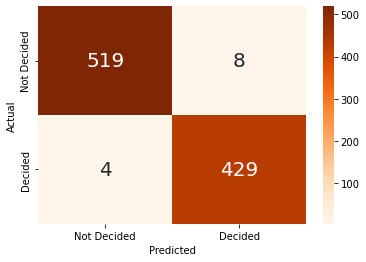

In [9]:
#Getting Confusion Matrix
confusion=confusion_matrix(Y_train,Prediction)
sns.heatmap(confusion,annot=True,cmap="Oranges",annot_kws={"size":20},fmt="0.0f",
           xticklabels=["Not Decided","Decided"],
           yticklabels=["Not Decided","Decided"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [10]:
#Getting Probabilities
Probability=SVM1.predict_proba(X_train)
Probability=pd.DataFrame(Probability)
Probability

,0,1
0,9.833372e-01,1.666275e-02
1,6.109606e-03,9.938904e-01
2,3.476899e-03,9.965231e-01
3,3.543004e-08,1.000000e+00
4,1.142661e-07,9.999999e-01
...,...,...
955,9.999998e-01,2.360909e-07
956,7.574763e-03,9.924252e-01
957,4.288654e-06,9.999957e-01
958,9.999771e-01,2.291094e-05


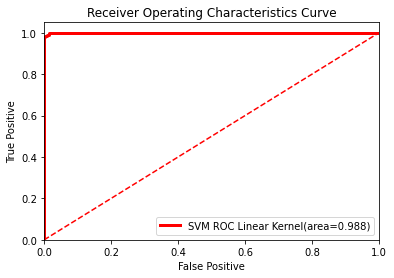

In [11]:
#ROC Curve
svmroc=roc_auc_score(Y_train,Prediction)
fpr,tpr,thresholds=roc_curve(Y_train,Probability[1])
plt.figure()
plt.plot(fpr,tpr,color="red",lw=3,label="SVM ROC Linear Kernel(area=%0.3f)" %svmroc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()

In [12]:
#Overall Accuracy,recall,precision
Prediction=SVM1.predict(X_test)
print("Accuracy=","{:.4f}".format(accuracy_score(Y_test,Prediction)))
print("Recall=","{:.4f}".format(recall_score(Y_test,Prediction)))
print("Precision","{:.4f}".format(precision_score(Y_test,Prediction)))

Accuracy= 0.9903
Recall= 0.9887
Precision 0.9887


In [ ]:
#ACCURACY ID 99% RECALL 98% PRECISION IS 98% WHICH MATCHES WITH THE MODEL

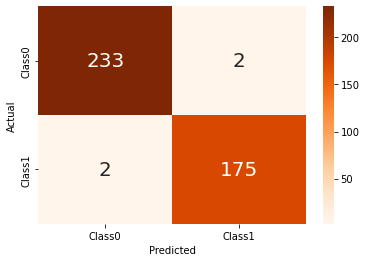

In [13]:
#Getting Confusion Matrix-test Data
confusion=confusion_matrix(Y_test,Prediction)
sns.heatmap(confusion,annot=True,cmap="Oranges",annot_kws={"size":20},fmt="0.0f",
           xticklabels=["Class0","Class1"],
           yticklabels=["Class0","Class1"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
#LINEAR DISCRIMINENT ANALYSIS

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

lda=LinearDiscriminantAnalysis()
X_lda=lda.fit_transform(X_train,Y_train)
VarExplained=lda.explained_variance_ratio_
print(VarExplained)
Model=lda.fit(X_train,Y_train)

[1.]


In [16]:
Model.get_params(deep=True)

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [17]:
Coef=Model.coef_
Coef=pd.DataFrame(Coef).transpose()
Coef.columns=["Fisher Z="]
Result=Coef.transpose()
Result.columns=["VARWAVELET","SKEWWAVELET","KURTWAVELET","ENTROPYIMAGE"]
print(Result)

           VARWAVELET  SKEWWAVELET  KURTWAVELET  ENTROPYIMAGE
Fisher Z=   -4.536382    -2.446516    -3.292128      0.117149


In [18]:
Scores=Model.decision_function(X)
Scores=pd.DataFrame(Scores)
Scores.columns=["ZScore"]
print(Scores)
Scores.to_csv("Zscores.csv",index=False)

         ZScore
0    -18.809560
1    -23.049344
2     -7.773731
3    -16.562310
4      3.870890
...         ...
1367   9.196648
1368   6.579193
1369   1.326581
1370   5.356664
1371  14.075741

[1372 rows x 1 columns]


              0         1
0  8.590270e-01  0.140973
1  3.576598e-05  0.999964
2  2.503379e-06  0.999997
3  1.810487e-08  1.000000
4  5.621628e-08  1.000000


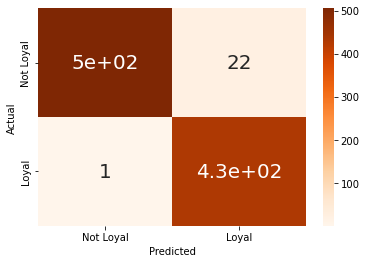

In [25]:
Posterior=Model.predict_proba(X_train)
Posterior=pd.DataFrame(Posterior)
print(Posterior.head())
pred_class=(Posterior[1]>0.5).astype(np.int) 
confusion=confusion_matrix(Y_train.astype(float),pred_class) 
sns.heatmap(confusion, annot=True,cmap="Oranges",annot_kws={"size":20},
           xticklabels=["Not Loyal","Loyal"],
           yticklabels=["Not Loyal","Loyal"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [27]:
#Getting Accuracy,Recall, and Precision
print("Accuracy=","{0:.4f}".format(accuracy_score(Y_train.astype(np.int),pred_class)))
print("Recall=","{0:.4f}".format(recall_score(Y_train.astype(np.int),pred_class)))
print("Precision=","{0:.4f}".format(precision_score(Y_train.astype(np.int),pred_class)))

Accuracy= 0.9760
Recall= 0.9977
Precision= 0.9515


In [ ]:
# THESE VALUES ALMOST MATCHES WITH THE SVM 

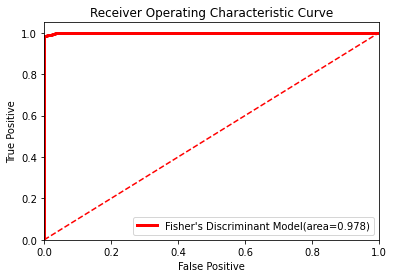

In [28]:
#Getting the ROC Curve
disroc=roc_auc_score(Y_train.astype(float),pred_class)
fpr,tpr,thresholds=roc_curve(Y_train.astype(float),Posterior[1])
plt.figure()
plt.plot(fpr,tpr,color="red",lw=3,label="Fisher's Discriminant Model(area=%0.3f)" %disroc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

In [30]:
Prediction_LDA=lda.predict(X_test)
print("Accuracy=","{:.4f}".format(accuracy_score(Y_test,Prediction_LDA)))
print("Recall=","{:.4f}".format(recall_score(Y_test,Prediction_LDA)))
print("Precision","{:.4f}".format(precision_score(Y_test,Prediction_LDA)))

Accuracy= 0.9757
Recall= 1.0000
Precision 0.9465


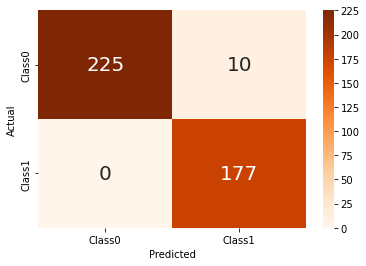

In [31]:
#PREDICTION MATCHES TRAINING WE CAN SAY THAT THIS MODEL IS WORKING WELL
confusion=confusion_matrix(Y_test,Prediction_LDA)
sns.heatmap(confusion,annot=True,cmap="Oranges",annot_kws={"size":20},fmt="0.0f",
           xticklabels=["Class0","Class1"],
           yticklabels=["Class0","Class1"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
#DECITION TREE

In [55]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier()
clf_tree=DecisionTreeClassifier(criterion="entropy",max_depth=7)
clf_tree.fit(X_train,Y_train)
tree_predict=clf_tree.predict(X_train)
round(accuracy_score(Y_train,tree_predict),3)
pred_prob=clf_tree.predict_proba(X_train)
#MAX DEPTH IS THE NUMBER OF DIVITIONS THAT HAVE TO BE MADE
#ENTROPY IS BETTER THAN GINI SO WE HAVE USED IT 

[Text(225.525, 203.85, 'X[0] <= 0.765\nentropy = 0.993\nsamples = 960\nvalue = [527, 433]'),
 Text(153.45000000000002, 176.67000000000002, 'X[1] <= 5.365\nentropy = 0.774\nsamples = 522\nvalue = [119, 403]'),
 Text(102.30000000000001, 149.49, 'X[0] <= 0.315\nentropy = 0.452\nsamples = 412\nvalue = [39, 373]'),
 Text(55.800000000000004, 122.31, 'X[2] <= 3.064\nentropy = 0.274\nsamples = 361\nvalue = [17, 344]'),
 Text(37.2, 95.13, 'entropy = 0.0\nsamples = 217\nvalue = [0, 217]'),
 Text(74.4, 95.13, 'X[1] <= -4.675\nentropy = 0.524\nsamples = 144\nvalue = [17, 127]'),
 Text(37.2, 67.94999999999999, 'X[0] <= -0.266\nentropy = 0.068\nsamples = 124\nvalue = [1, 123]'),
 Text(18.6, 40.77000000000001, 'entropy = 0.0\nsamples = 123\nvalue = [0, 123]'),
 Text(55.800000000000004, 40.77000000000001, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 67.94999999999999, 'X[2] <= 4.466\nentropy = 0.722\nsamples = 20\nvalue = [16, 4]'),
 Text(93.0, 40.77000000000001, 'X[3] <= -

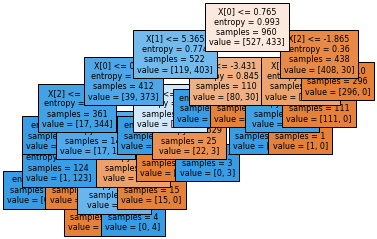

In [56]:
from sklearn import tree
tree.plot_tree(clf_tree,filled=True, fontsize=8)
#FONT REPRESENTS THE FONT OF THE TREE

In [57]:
confusion_matrix(Y_train,tree_predict)
#THIS IS USED TO GET CONFUSION MATRIX

array([[527,   0],
       [  0, 433]])

<AxesSubplot:>

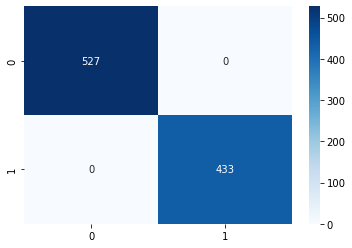

In [58]:
cm=confusion_matrix(Y_train,tree_predict)
sns.heatmap(cm,annot=True,cmap="Blues",fmt=".0f")

In [59]:
from sklearn.metrics import classification_report
Report=classification_report(Y_train,tree_predict)
print((Report))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       433

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [60]:
importances=clf_tree.feature_importances_
importances
importances=pd.DataFrame(importances)
Importance=importances.transpose()
Importance.columns=["VARWAVELET","SKEWWAVELET","KURTWAVELET","ENTROPYIMAGE"]
Importance

#THIS IMPORTANCE MATCHES WITH MODEL SO IT IS GOOD TO GO

,VARWAVELET,SKEWWAVELET,KURTWAVELET,ENTROPYIMAGE
0,0.562236,0.290523,0.129573,0.017668


In [61]:
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{"criterion":["gini","entropy"],
                  "max_depth":range(2,10)}]
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,
                tuned_parameters,
                cv=10,
                scoring="roc_auc")
clf.fit(X,Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [62]:
clf.best_score_

0.9890162253622133

In [63]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [92]:
prediction=tree_predict
Prediction=pd.DataFrame(prediction)
Prediction
Prediction=Prediction.iloc[:,1:9]

In [86]:
pred_prob=pd.DataFrame(pred_prob)
pred_prob
pred_class=(pred_prob[1]>=0.5).astype(np.int)

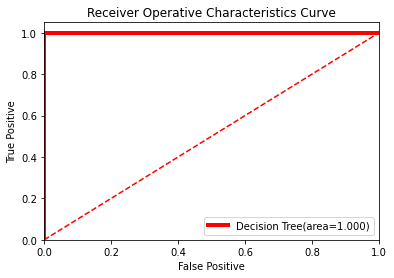

In [89]:
from sklearn.metrics import(roc_auc_score,roc_curve)
Y_test.head()
pred_class
dt_auc=roc_auc_score(Y_test.astype(int),pred_class)
fpr,tpr,thresholds=roc_curve(Y_test.astype(int),pred_prob[1])
plt.figure()
plt.plot(fpr,tpr, label="Decision Tree(area=%0.3f)" % dt_auc,lw=4,color="red")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operative Characteristics Curve")
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:>

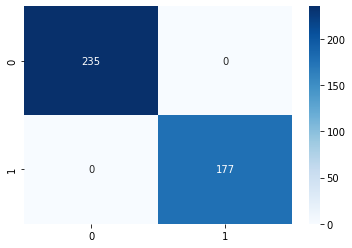

In [90]:
#THE ROC CURVE AND HEATMAP SHOWS IT IS WORKING EXCELLENTLY
cm=confusion_matrix(Y_test,tree_predict_test)
sns.heatmap(cm,annot=True,cmap="Blues",fmt=".0f")

In [ ]:
#RANDOM FOREST

In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import precision_score,recall_score
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

radom_clf=RandomForestClassifier(max_depth=20,n_estimators=10,random_state=2)
radom_clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=20, n_estimators=10, random_state=2)

In [96]:
prediction=radom_clf.predict(X_train)
prediction
print(prediction)
Prediction=pd.DataFrame(prediction)
Prediction=Prediction.iloc[:,0:4]

[0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1
 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0
 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1
 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0
 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1
 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0
 0 0 0 0 0 1 1 0 0 1 0 1 

In [97]:
pred_prob=radom_clf.predict_proba(X_train)
pred_prob=pd.DataFrame(pred_prob)
print(pred_prob)
pred_class=(pred_prob[1]>=0.5).astype(np.int)

       0    1
0    0.9  0.1
1    0.0  1.0
2    0.0  1.0
3    0.0  1.0
4    0.0  1.0
..   ...  ...
955  1.0  0.0
956  0.0  1.0
957  0.1  0.9
958  1.0  0.0
959  0.0  1.0

[960 rows x 2 columns]


<AxesSubplot:>

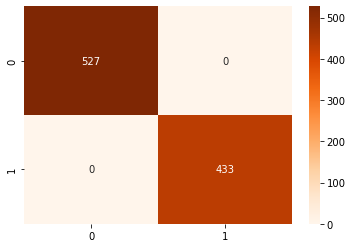

In [98]:
cm=confusion_matrix(Y_train,prediction)
sns.heatmap(cm,annot=True,cmap="Oranges",fmt=".0f")

In [99]:
from sklearn.metrics import classification_report
Report=classification_report(Y_train,prediction)
print((Report))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       433

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [100]:
importances=radom_clf.feature_importances_
importances
importances=pd.DataFrame(importances)
Importance=importances.transpose()
Importance.columns=["VARWAVELET","SKEWWAVELET","KURTWAVELET","ENTROPYIMAGE"]
Importance

,VARWAVELET,SKEWWAVELET,KURTWAVELET,ENTROPYIMAGE
0,0.55555,0.221931,0.179693,0.042825


In [101]:
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{"n_estimators":[10,20],
                  "max_depth":range(10,20),
                   "max_features":["sqrt",0.2]}]
radom_clf=RandomForestClassifier()
clf=GridSearchCV(radom_clf,
                tuned_parameters,
                cv=10,
                scoring="roc_auc")
clf.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(10, 20),
                          'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [102]:
clf.best_score_

0.9999561211057483

In [103]:
clf.best_params_

{'max_depth': 19, 'max_features': 0.2, 'n_estimators': 20}

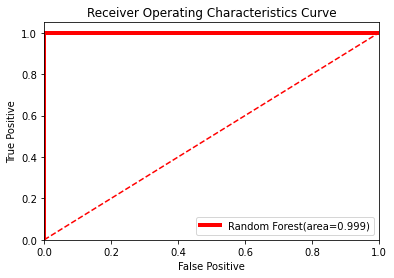

In [104]:
from sklearn.metrics import(roc_auc_score,roc_curve)
Y_train.head()
pred_class
rf_auc=roc_auc_score(Y_train.astype(int),pred_class)
fpr,tpr,thresholds=roc_curve(Y_train.astype(int),pred_prob[1])
plt.figure()
plt.plot(fpr,tpr,label="Random Forest(area=%0.3f)" % rf_auc,lw=4,color="red")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()

In [105]:
radom_clf.fit(X_test,Y_test)

RandomForestClassifier()

In [106]:
prediction=radom_clf.predict(X_test)
prediction
print(prediction)
Prediction=pd.DataFrame(prediction)
Prediction=Prediction.iloc[:,0:4]

[1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1
 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [107]:
pred_prob=radom_clf.predict_proba(X_test)
pred_prob=pd.DataFrame(pred_prob)
print(pred_prob)
pred_class=(pred_prob[1]>=0.5).astype(np.int)

        0     1
0    0.00  1.00
1    1.00  0.00
2    0.00  1.00
3    0.00  1.00
4    1.00  0.00
..    ...   ...
407  0.99  0.01
408  1.00  0.00
409  0.99  0.01
410  0.98  0.02
411  1.00  0.00

[412 rows x 2 columns]


<AxesSubplot:>

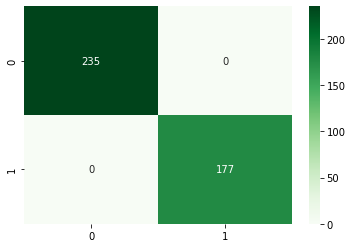

In [108]:
cm=confusion_matrix(Y_test,prediction)
sns.heatmap(cm,annot=True,cmap="Greens",fmt=".0f")

In [109]:
from sklearn.metrics import classification_report
Report=classification_report(Y_test,prediction)
print((Report))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [110]:
importances=radom_clf.feature_importances_
importances
importances=pd.DataFrame(importances)
Importance=importances.transpose()
Importance.columns=["VARWAVELET","SKEWWAVELET","KURTWAVELET","ENTROPYIMAGE"]
Importance

,VARWAVELET,SKEWWAVELET,KURTWAVELET,ENTROPYIMAGE
0,0.519609,0.266553,0.136678,0.07716


In [111]:
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{"n_estimators":[10,20],
                  "max_depth":range(10,20),
                   "max_features":["sqrt",0.2]}]
radom_clf=RandomForestClassifier()
clf=GridSearchCV(radom_clf,
                tuned_parameters,
                cv=10,
                scoring="roc_auc")
clf.fit(X_test,Y_test)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(10, 20),
                          'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [112]:
clf.best_score_

0.999537037037037

In [113]:
clf.best_params_

{'max_depth': 17, 'max_features': 0.2, 'n_estimators': 20}

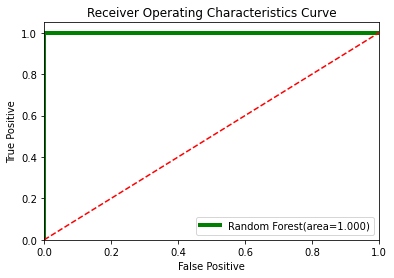

In [114]:
from sklearn.metrics import(roc_auc_score,roc_curve)
Y_test.head()
pred_class
rf_auc=roc_auc_score(Y_test.astype(int),pred_class)
fpr,tpr,thresholds=roc_curve(Y_test.astype(int),pred_prob[1])
plt.figure()
plt.plot(fpr,tpr,label="Random Forest(area=%0.3f)" % rf_auc,lw=4,color="green")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#FOR RANDOM FOREST THE PREDICTED VALUE MATCHES THE MODEL SO IT IS WORKING EXCELLENTLY
#IN ALL THE MODELS THE ACCURACY IS VERY GOOD SO WE CAN USE ANY OF THE MODEL
#ONLY THE TIME CONSTRAINTS ARE CHANGED REMAINING EVERYTHING IS ALMOST THE SAME
#THE ACCURACY PRECESSION AND RECALL HAS THE VARIENCE OF 1% SO ALL THE MODELS WORKED WELL